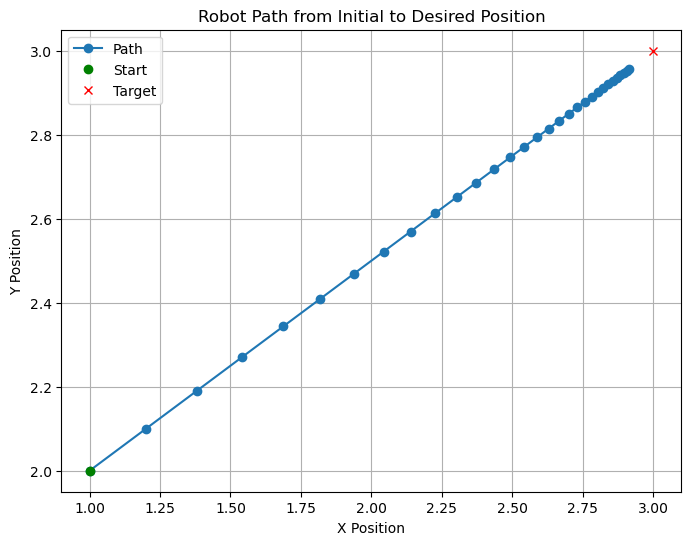

In [6]:
from numpy import array
from numpy.linalg import norm
from matplotlib.pyplot import figure, plot, show, xlabel, ylabel, title, legend, grid

K = 1
p_d = array([3, 3])
initial_position = array([1, 2], dtype=float)
time_step = 0.1
max_time = 10
tolerance = 0.1

positions = [initial_position.copy()]
current_position = initial_position.copy()
time_elapsed = 0

while norm(p_d - current_position) > tolerance and time_elapsed < max_time:
    u = K * (p_d - current_position)
    current_position += u * time_step
    positions.append(current_position.copy())
    time_elapsed += time_step

positions = array(positions)

figure(figsize=(8, 6))
plot(positions[:, 0], positions[:, 1], '-o', label='Path')
plot(initial_position[0], initial_position[1], 'go', label='Start')
plot(p_d[0], p_d[1], 'rx', label='Target')
xlabel('X Position')
ylabel('Y Position')
title('Robot Path from Initial to Desired Position')
legend()
grid(True)
show()

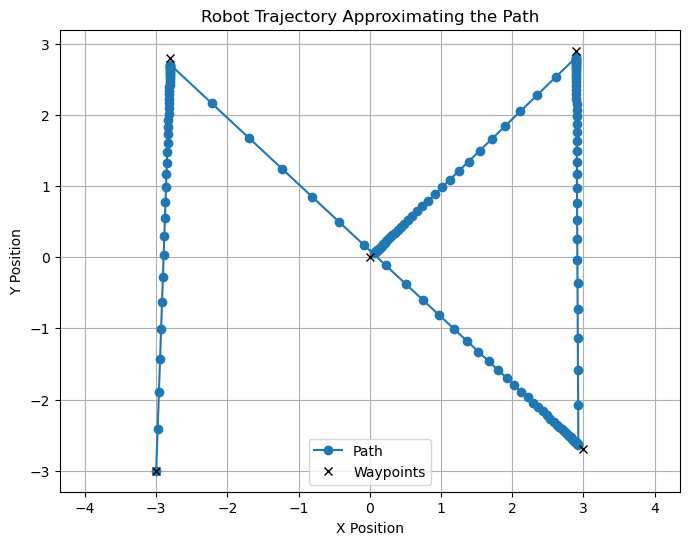

In [7]:
from matplotlib.pyplot import axis

waypoints = array([[-3, -3], [-2.8, 2.8], [3, -2.7], [2.9, 2.9], [0, 0]])

initial_position = waypoints[0]

positions = [initial_position.copy()] 
current_position = initial_position.copy()
current_waypoint_index = 0 
time_elapsed = 0 

while current_waypoint_index < len(waypoints):
    p_d = waypoints[current_waypoint_index]
    if norm(p_d - current_position) < tolerance:
        current_waypoint_index += 1
        if current_waypoint_index == len(waypoints):
            break 
        p_d = waypoints[current_waypoint_index]
    u = K * (p_d - current_position)
    current_position += u * time_step
    positions.append(current_position.copy())
    time_elapsed += time_step

positions = array(positions) 

figure(figsize=(8, 6))
plot(positions[:, 0], positions[:, 1], '-o', label='Path')
plot(waypoints[:, 0], waypoints[:, 1], 'kx', label='Waypoints')
xlabel('X Position')
ylabel('Y Position')
title('Robot Trajectory Approximating the Path')
legend()
grid(True)
axis('equal') 
show()